In [37]:
from pathlib import Path

import pandas as pd
import seaborn as sns

In [38]:
results_paths = list(Path("results").glob("*.csv"))
results_df = pd.concat([pd.read_csv(path, index_col=0) for path in results_paths],
                       names=["model"], keys=[path.stem for path in results_paths])
results_df

mse
model       layer           
nce         0      22.047942
            1      16.185011
            2      13.583901
            3      13.897542
            4      13.759231
            5      12.946279
            6      13.376123
            7      12.782101
            8      14.350307
            9      21.650621
autoencoder 0      22.048445
            1      16.185552
            2      13.583222
            3      13.897390
            4      13.760206
            5      12.947767
            6      13.376405
            7      12.780232
            8      14.350254
            9      21.650338

In [39]:
results_pivot = results_df.reset_index().pivot(index="layer", columns="model", values="mse")
results_pivot["MSE(NCE) - MSE(Autoencoder)"] = results_pivot["nce"] - results_pivot["autoencoder"]
results_pivot

model,autoencoder,nce,MSE(NCE) - MSE(Autoencoder)
layer,,,
0,22.048445,22.047942,-0.000504
1,16.185552,16.185011,-0.000541
2,13.583222,13.583901,0.000679
3,13.897390,13.897542,0.000151
4,13.760206,13.759231,-0.000976
5,12.947767,12.946279,-0.001488
6,13.376405,13.376123,-0.000282
7,12.780232,12.782101,0.001868
8,14.350254,14.350307,0.000053


Text(0.5, 1.0, 'HuBERT encoding analysis')

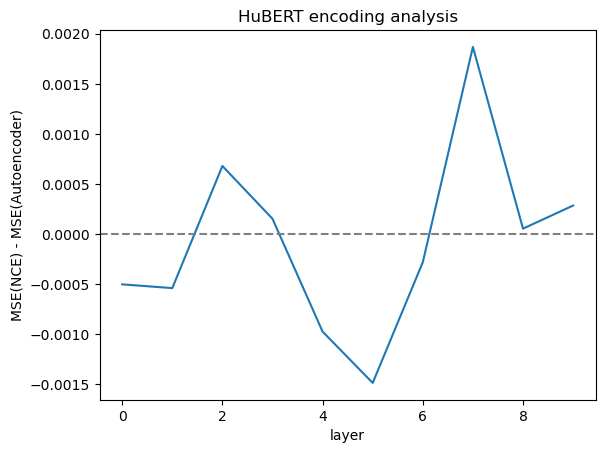

In [40]:
ax = sns.lineplot(data=results_pivot, x="layer", y="MSE(NCE) - MSE(Autoencoder)")
ax.axhline(0, ls="--", color="gray")
ax.set_title("HuBERT encoding analysis")